# Inferência - Prática 

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
import numpy as np

In [3]:
peng = sns.load_dataset('penguins')

In [4]:
peng.groupby('sex')['body_mass_g'].describe()

,count,mean,std,min,25%,50%,75%,max
sex,,,,,,,,
Female,165.0,3862.272727,666.172050,2700.0,3350.0,3650.0,4550.0,5200.0
Male,168.0,4545.684524,787.628884,3250.0,3900.0,4300.0,5312.5,6300.0


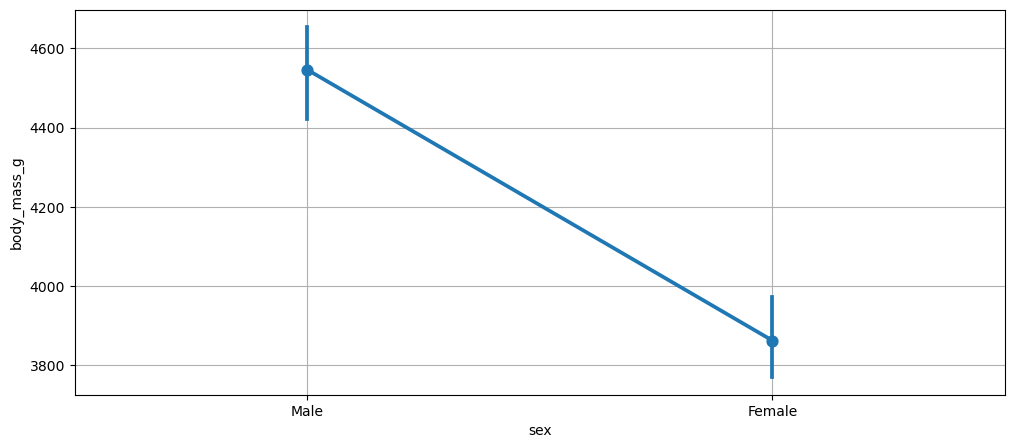

In [5]:
plt.figure(figsize=[12,5])
sns.pointplot(data=peng, x='sex', y = 'body_mass_g')
plt.grid()
plt.show()

## 1) Diferença de peso entre machos e fêmeas

Na base de pinguins, podemos ver que há diferença de peso entre machos e fêmeas. Mas será que é uma conclusão extrapolável a toda a população de pinguins? Assumindo que essa amostra é aleatória e representativa da população de pinguins, realize um teste T com 5% de significância para verificar se podemos induzir esta conclusão para a população toda.

In [7]:
# Removendo os dados faltantes para que não haja influência no valor de n
# n --> número de amostras

peng.dropna(inplace=True)
peng.info()

<class 'pandas.core.frame.DataFrame'>
Index: 333 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            333 non-null    object 
 1   island             333 non-null    object 
 2   bill_length_mm     333 non-null    float64
 3   bill_depth_mm      333 non-null    float64
 4   flipper_length_mm  333 non-null    float64
 5   body_mass_g        333 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 20.8+ KB


In [8]:
# Desvio padrão
desvpad = peng.groupby('sex')['body_mass_g'].var().mean()**.5

# médias por sexo
media_F = peng.groupby('sex')['body_mass_g'].mean()['Female']
media_M = peng.groupby('sex')['body_mass_g'].mean()['Male']

difer = media_M - media_F
n = peng.shape[0] # número de observações
erro_pad = desvpad*((1/n)**.5) # Desvio padrão / raiz do número de amostras
t = difer / erro_pad # Estatística do teste
RC = st.t.ppf(.95, 18) # Região crítica: sob h0, t está na RC 5% das vezes
p_value = 1 - st.t.cdf(t, 18)

print(f'--> Diferença: {difer:.2f}')
print(f'--> Desvio padrão: {desvpad:.2f}')
print(f'--> Erro padrão: {erro_pad:.2f}')
print(f'--> Estatística do teste: {t:.2f}')
print(f'--> Região crítica: {RC:.2f} ou mais')
print(f'--> P-value: {p_value:.5f} ou mais')

--> Diferença: 683.41
--> Desvio padrão: 729.43
--> Erro padrão: 39.97
--> Estatística do teste: 17.10
--> Região crítica: 1.73 ou mais
--> P-value: 0.00000 ou mais


Como podemos notar, particularmente pela quantidade p-value $\rightarrow 0$, é incontestável que há uma diferença significativa entre as massas dos pinguins machos e fêmeas. Sendo o p-value menor que $0.05$, rejeitamos a hipótese nula ($H_{0}$). Desta forma, podemos extrapolar, a princípio, a hipótese relacionada a diferença de massa entre os pinguins macho e fêmea para toda a população.

O valor do erro padrão não é muito alto, indicando que a média da amostra é capaz de representar bem a média da população.

Os painéis abaixo reforçam a distribuição de massa dos pinguins machos sendo majoritariamente mais elevada em relação aos pinguins fêmeas.


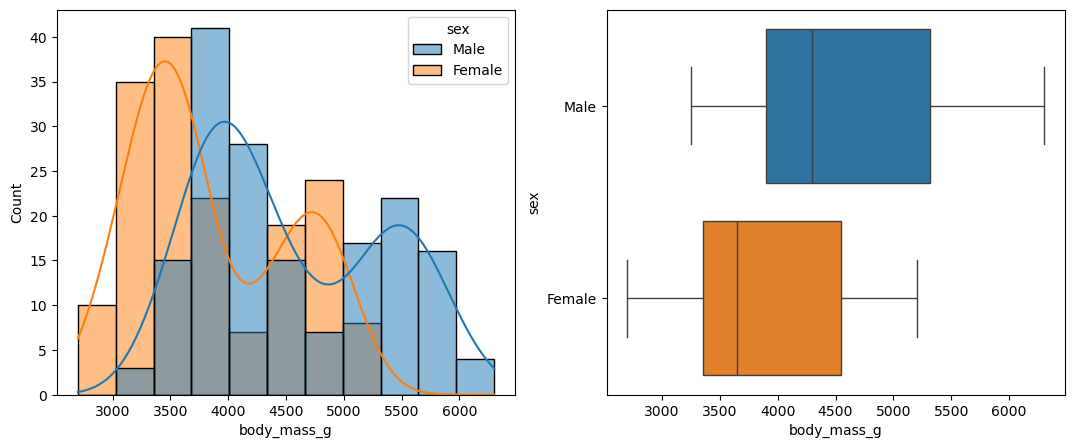

In [11]:
fig, ax = plt.subplots(1, 2, figsize=[13,5])

sns.histplot(peng, 
             x='body_mass_g', 
             hue='sex', 
             kde='scatter',
             ax = ax[0]
            )
sns.boxplot(peng, x='body_mass_g', y='sex', hue='sex', ax=ax[1])

plt.show()

## 2) (opcional) Representação gráfica do teste

Siga os passos da aula para você poder visualizar a estatística do teste, sua distribuição e a região crítica do teste.

A probabilidade para valores entre 1,73 e inf é de 5,00%


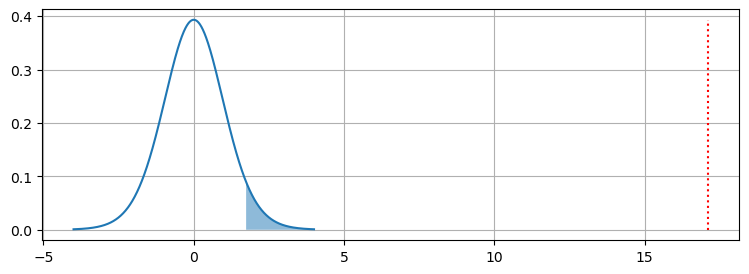

In [13]:
fig, ax = plt.subplots(figsize=[9,3])

# Parâmetros da densidade sob H0
mu = 0
variance = 1
sigma = variance**.5

# Valores de x e y para plot
x = np.linspace(mu - 4*sigma, mu + 4*sigma, 1000)
y = st.t.pdf(x, 18)

# low - denota o início da região crítica do teste
low = st.t.ppf(.95, 18)
high = np.inf

# Plots da densidade
ax.plot(x,y)
# Linha do valor da estatítica do teste
ax.vlines(x=[t], ymin=0, ymax=y.max(), colors='r', ls='dotted')

# área 
plt.fill_between(x, y, where=(low < x) & (x < high), alpha=.5)
plt.grid()

# Probabilidade de X pertencer à área
prob_area = st.t.cdf(high, 18) - st.t.cdf(low, 18)
print(f'A probabilidade para valores entre {low:.2f} e {high:.2f} é de {prob_area:.2%}'.replace('.',','))

## 3) Considere as espécies

Repita o exercício I, uma vez para cada espécie de pinguim. Qual é o *p-value* associado a cada raça?

##### Para a espécie "Adelie"

In [16]:
peng_A = peng[peng.species == 'Adelie']
peng_A.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male


--> Diferença: 674.66
--> Desvio padrão: 310.52
--> Erro padrão: 25.70
--> Estatística do teste: 26.25
--> Região crítica: 1.73 ou mais
--> P-value: 0.00000 ou mais
### A probabilidade para valores entre 1,73 e inf é de 5,00%


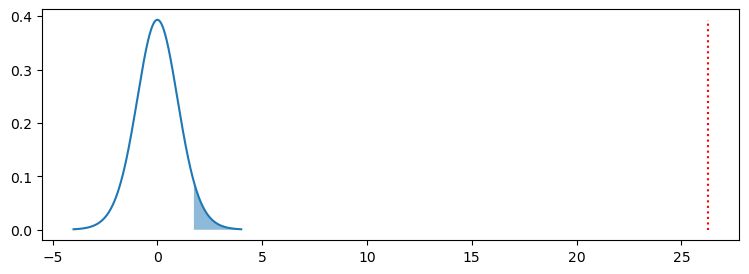

In [17]:
# Desvio padrão
desvpad = peng_A.groupby('sex')['body_mass_g'].var().mean()**.5

# médias por sexo
media_F = peng_A.groupby('sex')['body_mass_g'].mean()['Female']
media_M = peng_A.groupby('sex')['body_mass_g'].mean()['Male']

difer = media_M - media_F
n = peng_A.shape[0] # número de observações
erro_pad = desvpad*((1/n)**.5) # Desvio padrão / raiz do número de amostras
t = difer / erro_pad # Estatística do teste
RC = st.t.ppf(.95, 18) # Região crítica: sob h0, t está na RC 5% das vezes
p_value_A = 1 - st.t.cdf(t, 18)

print(f'--> Diferença: {difer:.2f}')
print(f'--> Desvio padrão: {desvpad:.2f}')
print(f'--> Erro padrão: {erro_pad:.2f}')
print(f'--> Estatística do teste: {t:.2f}')
print(f'--> Região crítica: {RC:.2f} ou mais')
print(f'--> P-value: {p_value_A:.5f} ou mais')


## Plots ##
fig, ax = plt.subplots(figsize=[9,3])

# Parâmetros da densidade sob H0
mu = 0
variance = 1
sigma = variance**.5

# Valores de x e y para plot
x = np.linspace(mu - 4*sigma, mu + 4*sigma, 1000)
y = st.t.pdf(x, 18)

# low - denota o início da região crítica do teste
low = st.t.ppf(.95, 18)
high = np.inf

# Plots da densidade
ax.plot(x,y)
# Linha do valor da estatítica do teste
ax.vlines(x=[t], ymin=0, ymax=y.max(), colors='r', ls='dotted')

# área 
plt.fill_between(x, y, where=(low < x) & (x < high), alpha=.5)
# plt.grid()

# Probabilidade de X pertencer à área
prob_area = st.t.cdf(high, 18) - st.t.cdf(low, 18)
print(f'### A probabilidade para valores entre {low:.2f} e {high:.2f} é de {prob_area:.2%}'.replace('.',','))

##### Para a espécie "Gentoo"

(119, 7)
--> Diferença: 805.09
--> Desvio padrão: 297.79
--> Erro padrão: 27.30
--> Estatística do teste: 29.49
--> Região crítica: 1.73 ou mais
--> P-value: 0.00000 ou mais
### A probabilidade para valores entre 1,73 e inf é de 5,00%


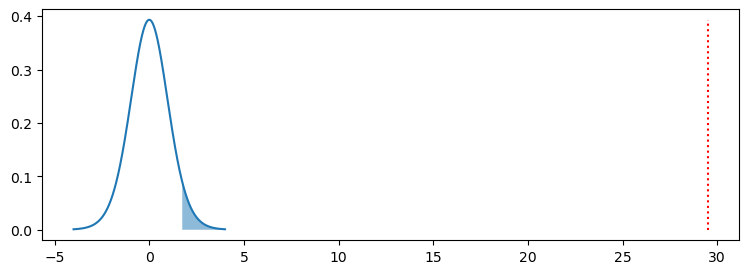

In [19]:
peng_G = peng[peng.species == 'Gentoo']
print(peng_G.shape)

# Desvio padrão
desvpad = peng_G.groupby('sex')['body_mass_g'].var().mean()**.5

# médias por sexo
media_F = peng_G.groupby('sex')['body_mass_g'].mean()['Female']
media_M = peng_G.groupby('sex')['body_mass_g'].mean()['Male']

difer = media_M - media_F
n = peng_G.shape[0] # número de observações
erro_pad = desvpad*((1/n)**.5) # Desvio padrão / raiz do número de amostras
t = difer / erro_pad # Estatística do teste
RC = st.t.ppf(.95, 18) # Região crítica: sob h0, t está na RC 5% das vezes
p_value_G = 1 - st.t.cdf(t, 18)

print(f'--> Diferença: {difer:.2f}')
print(f'--> Desvio padrão: {desvpad:.2f}')
print(f'--> Erro padrão: {erro_pad:.2f}')
print(f'--> Estatística do teste: {t:.2f}')
print(f'--> Região crítica: {RC:.2f} ou mais')
print(f'--> P-value: {p_value_G:.5f} ou mais')

## Plots ##
fig, ax = plt.subplots(figsize=[9,3])

# Parâmetros da densidade sob H0
mu = 0
variance = 1
sigma = variance**.5

# Valores de x e y para plot
x = np.linspace(mu - 4*sigma, mu + 4*sigma, 1000)
y = st.t.pdf(x, 18)

# low - denota o início da região crítica do teste
low = st.t.ppf(.95, 18)
high = np.inf

# Plots da densidade
ax.plot(x,y)
# Linha do valor da estatítica do teste
ax.vlines(x=[t], ymin=0, ymax=y.max(), colors='r', ls='dotted')

# área 
plt.fill_between(x, y, where=(low < x) & (x < high), alpha=.5)
# plt.grid()

# Probabilidade de X pertencer à área
prob_area = st.t.cdf(high, 18) - st.t.cdf(low, 18)
print(f'### A probabilidade para valores entre {low:.2f} e {high:.2f} é de {prob_area:.2%}'.replace('.',','))

##### Para a espécie "Chinstrap"

(68, 7)
--> Diferença: 411.76
--> Desvio padrão: 326.01
--> Erro padrão: 39.53
--> Estatística do teste: 10.42
--> Região crítica: 1.73 ou mais
--> P-value: 0.00000 ou mais
### A probabilidade para valores entre 1,73 e inf é de 5,00%


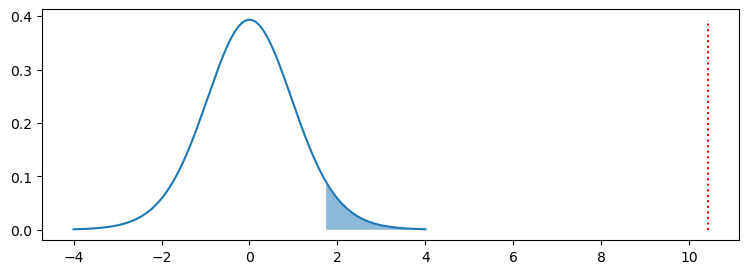

In [21]:
peng_C = peng[peng.species == 'Chinstrap']
print(peng_C.shape)

# Desvio padrão
desvpad = peng_C.groupby('sex')['body_mass_g'].var().mean()**.5

# médias por sexo
media_F = peng_C.groupby('sex')['body_mass_g'].mean()['Female']
media_M = peng_C.groupby('sex')['body_mass_g'].mean()['Male']

difer = media_M - media_F
n = peng_C.shape[0] # número de observações
erro_pad = desvpad*((1/n)**.5) # Desvio padrão / raiz do número de amostras
t = difer / erro_pad # Estatística do teste
RC = st.t.ppf(.95, 18) # Região crítica: sob h0, t está na RC 5% das vezes
p_value_C = 1 - st.t.cdf(t, 18)

print(f'--> Diferença: {difer:.2f}')
print(f'--> Desvio padrão: {desvpad:.2f}')
print(f'--> Erro padrão: {erro_pad:.2f}')
print(f'--> Estatística do teste: {t:.2f}')
print(f'--> Região crítica: {RC:.2f} ou mais')
print(f'--> P-value: {p_value_C:.5f} ou mais')


# PLOTS

fig, ax = plt.subplots(figsize=[9,3])

# Parâmetros da densidade sob H0
mu = 0
variance = 1
sigma = variance**.5

# Valores de x e y para plot
x = np.linspace(mu - 4*sigma, mu + 4*sigma, 1000)
y = st.t.pdf(x, 18)

# low - denota o início da região crítica do teste
low = st.t.ppf(.95, 18)
high = np.inf

# Plots da densidade
ax.plot(x,y)
# Linha do valor da estatítica do teste
ax.vlines(x=[t], ymin=0, ymax=y.max(), colors='r', ls='dotted')

# área 
plt.fill_between(x, y, where=(low < x) & (x < high), alpha=.5)
# plt.grid()

# Probabilidade de X pertencer à área
prob_area = st.t.cdf(high, 18) - st.t.cdf(low, 18)
print(f'### A probabilidade para valores entre {low:.2f} e {high:.2f} é de {prob_area:.2%}'.replace('.',','))

In [22]:
print('Em função das espécies obtivemos os seguintes p-values:')
pv = {'Adelie': p_value_A, 'Gentoo': p_value_G, 'Chinstrap': p_value_C}

for key, value in pv.items():
    print(f'--> Para a espécie {key} obtivemos um p-value de: {value}')

Em função das espécies obtivemos os seguintes p-values:
--> Para a espécie Adelie obtivemos um p-value de: 4.440892098500626e-16
--> Para a espécie Gentoo obtivemos um p-value de: 1.1102230246251565e-16
--> Para a espécie Chinstrap obtivemos um p-value de: 2.3781377977982743e-09
